In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import time
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [28]:
df = pd.read_csv("Data/listeningData_encoded.csv")
X = df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis = 1)
y = df['Depression']
#First split 70% into train and then another 30% into temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#Split the 30% into 20% for validation and 10% for testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [29]:
training_times = {}
mlp_train_losses = []
mlp_val_losses = []

#MLP
mlp = Sequential()
mlp.add(Dense(50, input_shape=(X_train.shape[1],), activation='tanh'))
mlp.add(Dense(100, activation='tanh'))
mlp.add(Dense(11, activation='softmax'))

mlp.compile(
    optimizer=SGD(learning_rate=0.1),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
start_time = time.time()
history_mlp = mlp.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    verbose=0
)

end_time = time.time()
training_times['MLP'] = (end_time - start_time) * 1000 # in milliseconds


#Answer to 1.8 Report the training time in milli second for all models.
print("Training Times:")
for model, t_time in training_times.items():
    print(f"  {model}: {t_time:.2f} ms")

# These lists will be used in subsequent steps for plotting learning curves
print("\nMLP Training Losses per epoch:", history_mlp.history['loss'])
print("MLP Validation Losses per epoch:", history_mlp.history['val_loss'])


c:\Users\Isabella\Documents\School\Third_Year\DS_3000_Machine_learning\DS3000-Group-4\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Times:
  MLP: 1732.21 ms

MLP Training Losses per epoch: [2.4361321926116943, 2.3560001850128174, 2.317894458770752, 2.270169258117676, 2.245178699493408, 2.2372426986694336, 2.2156858444213867, 2.1900224685668945, 2.1827571392059326, 2.163303852081299]
MLP Validation Losses per epoch: [2.455615282058716, 2.405682325363159, 2.380129814147949, 2.3776447772979736, 2.392625331878662, 2.3521409034729004, 2.345012664794922, 2.414799213409424, 2.3751308917999268, 2.3576300144195557]


--- MLP ---
Test accuracy: 0.0958904109589041
Precision: 0.059158864543843295
Recall: 0.0958904109589041
F1 Score: 0.07141631045740635
Confusion Matrix:
 [[4 2 3 0 0 1 2 4 0 0 0]
 [5 0 1 0 0 1 2 1 0 0 0]
 [2 3 3 1 0 0 2 2 1 0 1]
 [1 0 1 0 0 0 0 1 0 0 1]
 [3 1 4 0 0 0 2 3 1 0 1]
 [5 0 3 0 0 0 2 5 1 0 0]
 [6 0 3 0 0 1 2 4 3 0 0]
 [3 1 5 0 1 2 1 5 1 0 1]
 [7 1 3 0 0 0 4 2 0 0 0]
 [2 0 2 0 0 2 0 1 0 0 1]
 [1 0 1 0 0 1 1 2 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.25      0.15        16
           1       0.00      0.00      0.00        10
           2       0.10      0.20      0.14        15
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.11      0.11      0.11        19
           7       0.17      0.25      0.20        20
           8       0.00      0.00      0.00        17
     

c:\Users\Isabella\Documents\School\Third_Year\DS_3000_Machine_learning\DS3000-Group-4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Isabella\Documents\School\Third_Year\DS_3000_Machine_learning\DS3000-Group-4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Isabella\Documents\School\Third_Year\DS_3000_Machine_learning\DS3000-Group-4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0

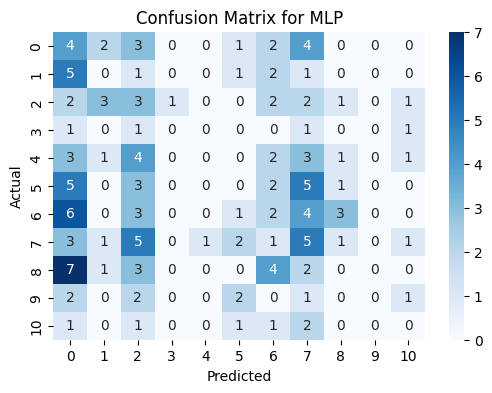

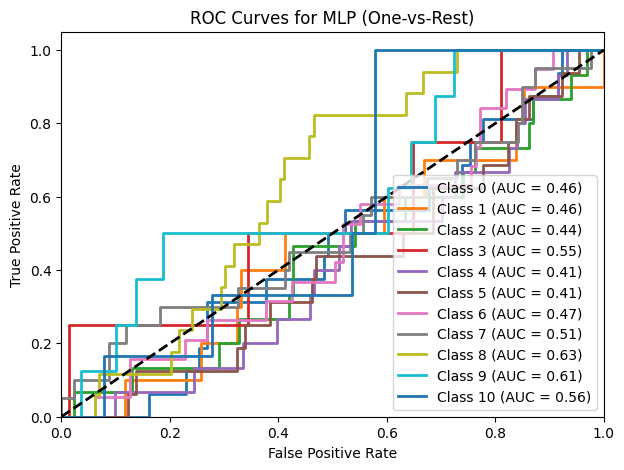


Test Times:
  MLP: 134.50 ms


In [30]:
y_test = np.round(y_test).astype(int)

models = {
    'MLP': mlp
}

test_times = {}

for model_name, model in models.items():
    start_test_time = time.time()

    y_test_pred_for_metrics = None
    y_score_for_roc = None
    
    # Keras models output probabilities directly when predict is called
    # for classification tasks with softmax activation.
    y_pred_proba_keras = model.predict(X_test, verbose=0)
    y_test_pred_for_metrics = np.argmax(y_pred_proba_keras, axis=1) # Convert probabilities to class labels
    y_score_for_roc = y_pred_proba_keras # Probabilities for ROC curve

    end_test_time = time.time()
    test_times[model_name] = (end_test_time - start_test_time) * 1000 # in milliseconds

    print(f"--- {model_name} ---")
    print("Test accuracy:", accuracy_score(y_test, y_test_pred_for_metrics))
    print("Precision:", precision_score(y_test, y_test_pred_for_metrics, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred_for_metrics, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred_for_metrics, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_for_metrics))
    print("Classification Report:\n", classification_report(y_test, y_test_pred_for_metrics))

    # ---- Confusion Matrix Plot ----
    cm = confusion_matrix(y_test, y_test_pred_for_metrics)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

     # Multiclass classification (One-vs-Rest)
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_for_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                    lw=2,
                    label=f'Class {classes[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {model_name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

#Answer to 2.3 Report the test time (in milli second) for all models.
print("\nTest Times:")
for model, t_time in test_times.items():
    print(f"  {model}: {t_time:.2f} ms")
